In [1]:
#Affected Tracts

In [2]:
import zipfile 
import pysal as ps
%matplotlib inline
import numpy as np
import ast
import json
import urllib
import urllib2
from cStringIO import StringIO
import pandas as pd
import requests
import os
import geopandas as gpd
import matplotlib.pylab as pl
from fiona.crs import from_epsg
import matplotlib.pylab as pl
from matplotlib import colors
import shapely
import seaborn as sns
import gzip
import mapreduce as mr
import csv
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [3]:
fname = 'Data/CensusTracks.geojson'
tracts = gpd.GeoDataFrame.from_file(fname)
tracts.head()

,Within15min,Within30min,boro_code,boro_ct_2010,boro_name,cdeligibil,ct_2010,ctlabel,geometry,id,ntacode,ntaname,puma,shape_area,shape_leng
0,0,0,5,5000900,Staten Island,I,000900,9,(POLYGON ((-74.07920577013245 40.6434307837456...,0,SI22,West New Brighton-New Brighton-St. George,3903,2497009.69813,7729.01679376
1,0,0,5,5007400,Staten Island,I,007400,74,(POLYGON ((-74.05974734759452 40.5938486115672...,1,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,5788237.79601,9902.94847281
2,0,0,1,1009800,Manhattan,I,009800,98,(POLYGON ((-73.96432543478758 40.7563815309909...,2,MN19,Turtle Bay-East Midtown,3808,1906016.35002,5534.19981063
3,0,0,1,1010000,Manhattan,I,010000,100,(POLYGON ((-73.96802436915851 40.7595781400528...,3,MN19,Turtle Bay-East Midtown,3808,1860938.37721,5692.16873705
4,0,0,1,1010200,Manhattan,I,010200,102,(POLYGON ((-73.97124277307127 40.7609364184790...,4,MN17,Midtown-Midtown South,3807,1860992.70485,5687.80243866


In [6]:
affectedTracts = tracts[tracts.Within15min == True]
affectedTracts.head()

,Within15min,Within30min,boro_code,boro_ct_2010,boro_name,cdeligibil,ct_2010,ctlabel,geometry,id,ntacode,ntaname,puma,shape_area,shape_leng
114,1,1,3,3028501,Brooklyn,I,028501,285.01,(POLYGON ((-73.93856854782675 40.6988481355494...,114,BK78,Bushwick South,4002,895739.69679,4167.68973824
133,1,1,3,3036300,Brooklyn,E,036300,363,(POLYGON ((-73.91400482503951 40.6732394879431...,133,BK79,Ocean Hill,4007,2785736.31011,8445.46688322
134,1,1,3,3036502,Brooklyn,E,036502,365.02,(POLYGON ((-73.90267831840295 40.6757897287538...,134,BK79,Ocean Hill,4007,1252061.56461,6132.19606711
137,1,1,3,3039700,Brooklyn,E,039700,397,(POLYGON ((-73.91464246723457 40.6875070419845...,137,BK78,Bushwick South,4002,1712820.27346,6560.68169372
138,1,1,3,3039900,Brooklyn,E,039900,399,(POLYGON ((-73.92115385566102 40.6927966934759...,138,BK78,Bushwick South,4002,1627809.30279,6391.34887911


In [28]:
fileUrl = 'https://data.cityofnewyork.us/api/geospatial/3qz8-muuu?method=export&format=GeoJSON'
filebuffer = urllib.urlretrieve(fileUrl, filename='Subway Lines.geojson')
fname = 'Subway Lines.geojson'
print (fname)
subways = gpd.GeoDataFrame.from_file('Subway Lines.geojson')

Subway Lines.geojson


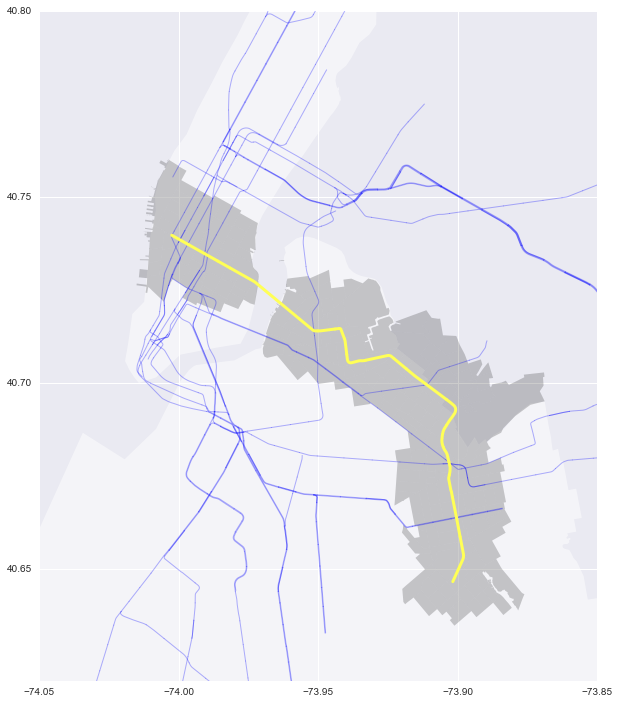

In [47]:
# import osmnx as ox
# mn_bounds = ox.gdf_from_place('Manhattan, New York City, New York, USA')
# bk_bounds = ox.gdf_from_place('Brooklyn, New York City, New York, USA')
# nyc_streets = ox.graph_from_place('New York City, New York, USA')

# G = ox.graph_from_place('Manhattan, New York, USA', network_type='drive')
# ox.plot_graph(ox.project_graph(G))

fig, ax = pl.subplots(figsize=(10,12))
pl.ylim(40.62, 40.8)
pl.xlim(-74.05, -73.85)
mn_bounds.plot(ax=ax, color='w', linewidth=0)
bk_bounds.plot(ax=ax, color='white', linewidth=0)
affectedTracts.plot(ax=ax, color='k', alpha=0.2, linewidth=0)
subways.plot(ax=ax, color='b', alpha=0.3)
subways[subways.name=='L'].plot(ax=ax, color='#ffff56', linewidth=3)

In [61]:
affectedTracts_bkqn = affectedTracts[(affectedTracts.boro_code=='3') | (affectedTracts.boro_code=='4')]
len(affectedTracts_bkqn)

159

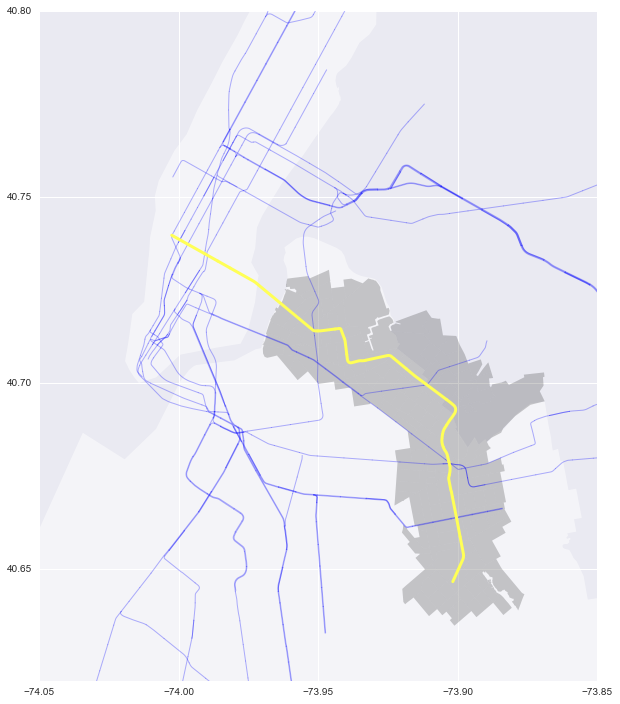

In [62]:
fig, ax = pl.subplots(figsize=(10,12))
pl.ylim(40.62, 40.8)
pl.xlim(-74.05, -73.85)
mn_bounds.plot(ax=ax, color='w', linewidth=0)
bk_bounds.plot(ax=ax, color='white', linewidth=0)
affectedTracts_bkqn.plot(ax=ax, color='k', alpha=0.2, linewidth=0)
subways.plot(ax=ax, color='b', alpha=0.3)
subways[subways.name=='L'].plot(ax=ax, color='#ffff56', linewidth=3)